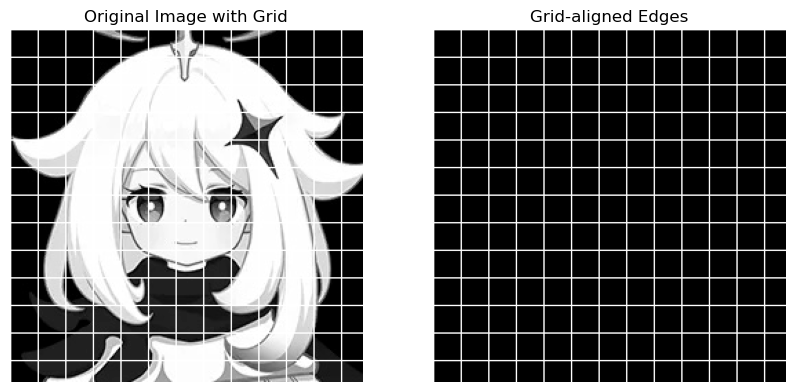

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def snap_to_grid(x, y, grid_size):
    """ Snap x, y coordinates to the nearest grid point """
    return round(x / grid_size) * grid_size, round(y / grid_size) * grid_size

def draw_grid(img, grid_size):
    """ Draw a grid on an image """
    for i in range(0, img.shape[1], grid_size):
        cv2.line(img, (i, 0), (i, img.shape[0]), color=(255, 255, 255), thickness=1)
    for j in range(0, img.shape[0], grid_size):
        cv2.line(img, (0, j), (img.shape[1], j), color=(255, 255, 255), thickness=1)

# Load image and convert to grayscale
img = cv2.imread('../static/02.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Edge detection
edges = cv2.Canny(blurred_img, 50, 150)

# Set grid size
grid_size = 20

# Create a blank image to draw grid-aligned edges
grid_img = np.zeros_like(edges)

# Snap edges to grid
for y in range(edges.shape[0]):
    for x in range(edges.shape[1]):
        if edges[y, x] != 0:
            gx, gy = snap_to_grid(x, y, grid_size)
            if gx < grid_img.shape[1] and gy < grid_img.shape[0]:
                grid_img[gy, gx] = 255

# Draw grid on the original and grid-aligned edge images
draw_grid(img, grid_size)
draw_grid(grid_img, grid_size)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image with Grid')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grid_img, cmap='gray')
plt.title('Grid-aligned Edges')
plt.axis('off')

plt.show()
